In [1]:
using HDF5, PyPlot, Glob, DataFrames, Dates, Distributions, GLM, StatsBase, NaNStatistics

In [2]:
drv = "/mnt/a82d7171-92f9-48ad-9ba4-aea036c8fec8/data_storage/collabs/maya/oddball/output/"
file_list = glob("*h5",drv)
fps = 4
colors=[[241, 106, 5],[82, 121, 111],[165, 0, 43],[79, 53, 155]]./255

4-element Vector{Vector{Float64}}:
 [0.9450980392156862, 0.41568627450980394, 0.0196078431372549]
 [0.3215686274509804, 0.4745098039215686, 0.43529411764705883]
 [0.6470588235294118, 0.0, 0.16862745098039217]
 [0.30980392156862746, 0.20784313725490197, 0.6078431372549019]

In [3]:
file_list

3-element Vector{String}:
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 29 bytes ⋯ "bs/maya/oddball/output/1sISI.h5"
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 29 bytes ⋯ "bs/maya/oddball/output/2sISI.h5"
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 29 bytes ⋯ "bs/maya/oddball/output/3sISI.h5"

In [5]:
isi1 = h5open(file_list[1])
isi2 = h5open(file_list[2])
isi3 = h5open(file_list[3])

🗂️ HDF5.File: (read-only) /mnt/a82d7171-92f9-48ad-9ba4-aea036c8fec8/data_storage/collabs/maya/oddball/output/3sISI.h5
├─ 📂 auditory
│  ├─ 🔢 coef
│  ├─ 🔢 nonsig_rois
│  ├─ 🔢 pval
│  ├─ 🔢 r2
│  ├─ 🔢 reg
│  └─ 🔢 sig_rois
├─ 🔢 centroids
├─ 📂 freq1
│  ├─ 🔢 coef
│  ├─ 🔢 nonsig_rois
│  ├─ 🔢 pval
│  ├─ 🔢 r2
│  ├─ 🔢 reg
│  └─ 🔢 sig_rois
├─ 📂 freq2
│  ├─ 🔢 coef
│  ├─ 🔢 nonsig_rois
│  ├─ 🔢 pval
│  ├─ 🔢 r2
│  ├─ 🔢 reg
│  └─ 🔢 sig_rois
├─ 🔢 idx_fish
├─ 📂 ob_1st
│  ├─ 🔢 coef
│  ├─ 🔢 nonsig_rois
│  ├─ 🔢 pval
│  ├─ 🔢 r2
│  ├─ 🔢 reg
│  └─ 🔢 sig_rois
├─ 📂 ob_1st_offset
│  ├─ 🔢 coef
│  ├─ 🔢 nonsig_rois
│  ├─ 🔢 pval
│  ├─ 🔢 r2
│  ├─ 🔢 reg
│  └─ 🔢 sig_rois
├─ 📂 ob_2nd
│  ├─ 🔢 coef
│  ├─ 🔢 nonsig_rois
│  ├─ 🔢 pval
│  ├─ 🔢 r2
│  ├─ 🔢 reg
│  └─ 🔢 sig_rois
├─ 📂 ob_2nd_offset
│  ├─ 🔢 coef
│  ├─ 🔢 nonsig_rois
│  ├─ 🔢 pval
│  ├─ 🔢 r2
│  ├─ 🔢 reg
│  └─ 🔢 sig_rois
├─ 📂 oddball
│  ├─ 🔢 coef
│  ├─ 🔢 nonsig_rois
│  ├─ 🔢 pval
│  ├─ 🔢 r2
│  ├─ 🔢 reg
│  └─ 🔢 sig_rois
├─ 📂 oddball_offset
│  ├─ 🔢 coef
│  ├─ 🔢 nonsig_rois
│

0

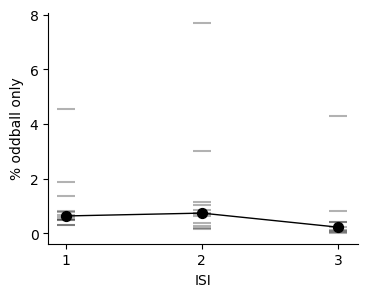

PyObject Text(24,0.5,'% oddball only')

In [39]:
ys = zeros(3,15); fill!(ys,NaN)

figure(figsize=(4,3))
ax = subplot(111)
t = 1
for isi in [isi1,isi2,isi3]
    #c = isi["centroids"][]
    fish_idx = isi["idx_fish"][]
    ar1 = isi["freq1"]["sig_rois"][]
    ar2 = isi["freq2"]["sig_rois"][] 

    or1 = isi["ob_1st"]["sig_rois"][] 
    or2 = isi["ob_2nd"]["sig_rois"][] 
    or = vcat(or1,or2)
    ar = vcat(ar1,ar2)
    idx = intersect(ar,or)
    fish = unique(fish_idx)[1]
    ctr = 1
    for fish in unique(fish_idx)
        idx2 = findall(fish_idx[1,:] .== fish)
        both_intersect = intersect(idx,idx2)
        or_intersect = intersect(or,idx2)
        ob_only = length(or_intersect) - length(both_intersect)
        y = (ob_only./length(idx2))*100
        scatter(t,y,marker="_",s=150,color="black",alpha=0.3)
        ys[t,ctr] = y
        ctr+=1
    end
    t+=1
end

for t = 1:3
    scatter(t,nanmedian(ys[t,:]),color="black",s=50)
    if t < 3
        plot([t,t+1],[nanmedian(ys[t,:]),nanmedian(ys[t+1,:])],color="black",linewidth=1)
    end
end

ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.set_xticks([1,2,3])
xlabel("ISI")
ylabel("% oddball only")

In [35]:
ys

3×15 Matrix{Float64}:
 0.128655  0.281818   0.216216  0.12      …    0.182143  NaN  NaN  NaN
 0.833532  0.0318471  0.0       0.208333       0.276596  NaN  NaN  NaN
 1.0       0.175824   0.257143  0.2          NaN         NaN  NaN  NaN

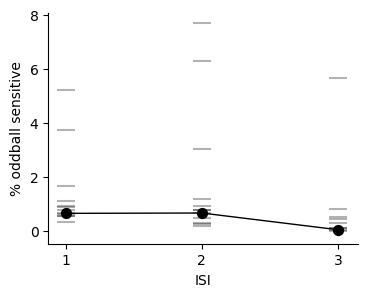

PyObject Text(24,0.5,'% oddball sensitive')

In [31]:
ys = zeros(3,15)

figure(figsize=(4,3))
ax = subplot(111)
t = 1
for isi in [isi1,isi2,isi3]
    fish_idx = isi["idx_fish"][]
    or1 = isi["ob_1st"]["sig_rois"][] 
    or2 = isi["ob_2nd"]["sig_rois"][] 
    or = vcat(or1,or2)
    fish = unique(fish_idx)[1]
    ctr = 1
    for fish in unique(fish_idx)
        idx2 = findall(fish_idx[1,:] .== fish)
        both_intersect = intersect(or,idx2)
        y = (length(both_intersect)./length(idx2)) *100
        scatter(t,y,marker="_",s=150,color="black",alpha=0.3)
        ys[t,ctr] = y
        ctr+=1
    end
    t+=1
end

for t = 1:3
    scatter(t,nanmedian(ys[t,:]),color="black",s=50)
    if t < 3
        plot([t,t+1],[nanmedian(ys[t,:]),nanmedian(ys[t+1,:])],color="black",linewidth=1)
    end
end

ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.set_xticks([1,2,3])
xlabel("ISI")
ylabel("% oddball sensitive")